##**Análisis de entimientos Twitter**
* Elabrado por:
Gabriel Tehozol 
* Contacto:
gabrieltehozol@gmail.com

Este código es un programa de análisis sentimental que utiliza la biblioteca Python Tweepy para acceder a la API de Twitter, y luego utiliza TextBlob y visualizar los tweets recolectados. El código comienza importando varias bibliotecas necesarias para el procesamiento de datos y la autenticación de la API de Twitter. Luego, utiliza las credenciales de la API de Twitter para autenticar y crear un objeto API. A continuación, el código utiliza la búsqueda de Tweepy para recolectar tweets que contengan la palabra "México" en español. Estos tweets se imprimen y luego se guardan en un dataframe de Pandas. Finalmente, el código define una función para limpiar el texto de los tweets y se aplica a los tweets almacenados en el dataframe.

El siguiente código importa varias librerías para un proyecto de análisis de Twitter.

* La librería [tweepy](https://www.tweepy.org/) se utiliza para acceder a la API de Twitter.
* [textblob](https://textblob.readthedocs.io/en/dev/) se utiliza para realizar el análisis de sentimiento en los tweets recolectados.
* [wordcloud](https://amueller.github.io/word_cloud/) se utiliza para crear una nube de palabras a partir de los tweets recolectados.
* [pandas](https://pandas.pydata.org/) y [numpy](https://numpy.org/) se utilizan para manipular y analizar datos.
* [re](https://docs.python.org/3/library/re.html) se utiliza para limpiar y procesar los datos de los tweets.
* [time](https://docs.python.org/3/library/time.html) se utiliza para esperar entre solicitudes de la API de Twitter.
* string se utiliza para limpiar los caracteres especiales de los tweets.
* [matplotlib](https://matplotlib.org/).pyplot se utiliza para crear gráficos y visualizaciones a partir de los datos recolectados. Además, establece el estilo de los gráficos a utilizar con el estilo "fivethirtyeight".

In [42]:
# Importamos librearías
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import time
import string
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

El siguiente código contiene las credenciales necesarias para conectarse a la API de Twitter.

**clave_consumidor** es la clave pública de la aplicación.
**clave_secreta** es el secreto de la aplicación.
**token_acceso** es el token de acceso de un usuario autorizado para usar la aplicación.
**token_secreto** es el secreto del token de acceso.
Estas credenciales son necesarias para autenticar la aplicación y poder acceder a los datos de Twitter. En este caso, las credenciales están representadas por una serie de "X" ya que son información confidencial y no se deben compartir públicamente.

Una forma mejor de manejar las credenciales es guardarlas en un archivo separado y llamarlas en el código principal, esto evita exponer las credenciales en el código.

In [43]:
# Credenciales API de Twitter
clave_consumidor = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
clave_secreta = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
token_acceso = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
token_secreto = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

El siguiente código es una función llamada create_api() que se utiliza para autenticar y establecer una conexión a la API de Twitter.

En el cuerpo de la función se crea un objeto de autenticación utilizando la librería tweepy y las credenciales **clave_consumidor** y **clave_secreta**. Luego, se establecen los tokens de acceso **token_acceso** y **token_secreto** en el objeto de autenticación. Por último, se crea un objeto de la clase API utilizando el objeto de autenticación recién creado y se establece la opción "wait_on_rate_limit" en "True".

In [45]:
# Creamos una función que recolecte las claves 
def crear_api(clave_consumidor, clave_secreta, token_acceso, token_secreto):
    authenticate = tweepy.OAuthHandler(clave_consumidor, clave_secreta)
    authenticate.set_access_token(token_acceso, token_secreto)
    api = tweepy.API(authenticate, wait_on_rate_limit = True)
    return api

hora, se pasan las credenciales como argumentos y se asigna el valor de retorno a una variable

In [46]:
api = crear_api(clave_consumidor, clave_secreta, token_acceso, token_secreto)

In [47]:
# Creamos una una función llamada buscar_tweets() que toma el término de búsqueda, 
# la cantidad de tweets y el idioma como argumentos, y devuelve los tweets encontrados.
def buscar_tweets(api, term, count=100, lang='es'):
    try:
        tweets = api.search(q=term, count=count, lang=lang, tweet_mode='extended')
    except tweepy.error.TweepError as e:
        print(f'Error: {e}')
        tweets = []
    return tweets


La función busca tweets que contengan el término especificado, con un límite de tweets especificado y en un idioma especificado. Ademas se valida si hay algún error al buscar los tweets.

In [48]:
# Se aplica la función con los argumentos necesarios, por ahora 
# busca automaticamente "count" y "ang" pero se puede cambiar si así se desea
tweets = buscar_tweets(api, 'México')

In [49]:
# definimos la función imprimir_tweets() podría ser utilizada 
# para imprimir los últimos 5 tweets encontrados. 
def imprimir_tweets(tweets):
    if tweets:
        print("Showing the 5 recent tweets: \n")
        for i, tweet in enumerate(tweets[:5], 1):
            print(f"{i}) {tweet.full_text}\n")
    else:
        print("No tweets found.")
"""
En esta función, se utiliza un bucle for para recorrer 
los primeros 5 tweets en la lista de tweets y se imprime el número de tweet 
y el texto completo de cada tweet. Si no hay tweets, se imprime un mensaje 
indicando que no se encontraron tweets.
"""

'\nEn esta función, se utiliza un bucle for para recorrer \nlos primeros 5 tweets en la lista de tweets y se imprime el número de tweet \ny el texto completo de cada tweet. Si no hay tweets, se imprime un mensaje \nindicando que no se encontraron tweets.\n'

In [50]:
# Ponemos en uso la función
imprimir_tweets(tweets)

Showing the 5 recent tweets: 

1) RT @sugadboy: — El nuevo programa de variedades de tvN "Seojin's" se lanzará el 24 de febrero y estará protagonizado por #V, Park Seojoon,…

2) RT @jchavarria_cine: Ahora va un #comic con aire a objeto de culto. Se trata del brutal #BigManPlans de @goonguy, publicado en México por @…

3) RT @MerGarza: ¿Se acuerdan cuando Debanhi se había tirado sola a la cisterna? ¿Y cuando Yolanda se quitó la vida? Pues ahora María Ángela d…

4) RT @sugadboy: — El nuevo programa de variedades de tvN "Seojin's" se lanzará el 24 de febrero y estará protagonizado por #V, Park Seojoon,…

5) RT @OaxacaPolitico: ✍🏼Columna | México debe juzgar a García Luna y a Calderón por traición a la patria y corrupción / en la opinión de ⁦@ep…



In [51]:
# Este código creando una función llamada crear_dataframe() 
# que toma una lista de tweets como argumento y devuelve un 
# DataFrame con una columna llamada "Tweets"
def crear_dataframe(tweets):
    data = {'Tweets': [tweet.full_text for tweet in tweets]}
    df = pd.DataFrame(data)
    return df

In [52]:
# Definimos una variable con nuestra función
df = crear_dataframe(tweets)

In [53]:
# Observamos las primeros 5 entradas 
df.head()

,Tweets
0,RT @sugadboy: — El nuevo programa de variedade...
1,RT @jchavarria_cine: Ahora va un #comic con ai...
2,RT @MerGarza: ¿Se acuerdan cuando Debanhi se h...
3,RT @sugadboy: — El nuevo programa de variedade...
4,RT @OaxacaPolitico: ✍🏼Columna | México debe ju...


Ahora, cramos una nueva función limpiar_texto() toma un DataFrame y un nombre de columna como argumentos, y aplica la función limpiarTexto() a cada elemento de la columna especificada, utilizando el método apply() de pandas.
Además, se encapusula la función limpiarTexto() dentro de la función limpiar_texto() para mejorar la legibilidad del código y para poder tener un mejor control de las variables dentro de la función. De esta manera, se evita la necesidad de declarar variables globales y se asegura que la función limpiarTexto() sólo sea utilizada dentro de limpiar_texto(). Esto también ayuda a mantener una mayor organización y modularidad en el código.

In [54]:
def limpiar_texto(df, column):
    def limpiarTexto(text):
        text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remueve menciones
        text = re.sub(r'#', '', text) # Remueve el simbolo '#' 
        text = re.sub(r'RT[\s]+', '', text) # Remueve los RT
        text = re.sub(r'https?:\/\/\S+', '', text) # Remueve las ligas

        return text
    df[column] = df[column].apply(lambda x: limpiarTexto(x))
    return df

df = limpiar_texto(df, 'Tweets')

In [55]:
# Observamos las primeros 5 entradas 
df.head()

,Tweets
0,": — El nuevo programa de variedades de tvN ""Se..."
1,_cine: Ahora va un comic con aire a objeto de ...
2,: ¿Se acuerdan cuando Debanhi se había tirado ...
3,": — El nuevo programa de variedades de tvN ""Se..."
4,: ✍🏼Columna | México debe juzgar a García Luna...


Creamos una función llamada sentimiento(text) que toma un texto como argumento y utiliza TextBlob para calcular tanto la polaridad como la subjetividad del texto. Esta función devuelve un diccionario con las claves 'polarity' y 'subjectivity' y sus valores correspondientes. De esta manera, se evita tener que crear dos funciones separadas y se reduce la cantidad de código repetido.
También se puede considerar eliminar las instrucciones de time.sleep ya que se pueden sobrepasar los límites de acceso a la API de twitter.

In [56]:
def sentimiento(text):
    text_blob = TextBlob(text).translate(from_lang='es', to='en')
    time.sleep(5)
    return {'polaridad': text_blob.sentiment.polarity, 'subjetividad': text_blob.sentiment.subjectivity}

In [57]:
sentimientos = df['Tweets'].apply(sentimiento)
df = df.join(sentimientos.apply(pd.Series))

In [58]:
# Observamos las primeros 5 entradas 
df.head()

,Tweets,polaridad,subjetividad
0,": — El nuevo programa de variedades de tvN ""Se...",0.136364,0.454545
1,_cine: Ahora va un comic con aire a objeto de ...,-0.312500,0.750000
2,: ¿Se acuerdan cuando Debanhi se había tirado ...,0.000000,0.000000
3,": — El nuevo programa de variedades de tvN ""Se...",0.136364,0.454545
4,: ✍🏼Columna | México debe juzgar a García Luna...,0.000000,0.000000


In [59]:
# Creaos una función para analizar la polaridad de los datos
df['analisis'] = df['polaridad'].apply(lambda score: 'Negativo' if score < 0 else ('Neutral' if score == 0 else 'Positivo'))


In [60]:
# Observamos las primeros 5 entradas 
df.head()

,Tweets,polaridad,subjetividad,analisis
0,": — El nuevo programa de variedades de tvN ""Se...",0.136364,0.454545,Positivo
1,_cine: Ahora va un comic con aire a objeto de ...,-0.312500,0.750000,Negativo
2,: ¿Se acuerdan cuando Debanhi se había tirado ...,0.000000,0.000000,Neutral
3,": — El nuevo programa de variedades de tvN ""Se...",0.136364,0.454545,Positivo
4,: ✍🏼Columna | México debe juzgar a García Luna...,0.000000,0.000000,Neutral


In [61]:
# El código ordena los tweets de un dataframe "df" por su polaridad y
# luego imprime los tweets con análisis "Positivo" en orden. 
# Cada tweet impreso tiene un número delante de él (empezando en 1) y un salto de línea después.
sortedDF = df.sort_values(by=['polaridad'])
positive_tweets = [f"{i+1}) {tweet}" for i, tweet in enumerate(sortedDF[sortedDF['analisis'] == 'Positivo']['Tweets'])]
for tweet in positive_tweets:
    print(tweet)
    print()


1) _OCDE: A pesar de los avances, México tiene el gasto público social más bajo de los países OCDE. Colombia y Costa Rica también…

2) _NUEVO_CLON   No te parece ser colonia que te quiten la mitad del país? California y Texas legalmente siguen siendo de México de facto no, cualquier gringo entra aquí no cualquiera entra a Estados Unidos. Si yo tampoco estoy de acuerdo.

3) : Detuvieron a Ovidio por pedido de extradición de EU.

No tenía órdenes de aprehensión en México, a pesar de la violenci…

4) : La defensa de la democracia está en marcha. Los Diputados Federales de Va por México presentamos ante la  una acci…

5) Todo listo para el 20º Festival Internacional de Cine Judío México  

 

6) 🚨📢| Instalan postes metálicos y lámparas LED para garantizar servicio de alumbrado público en Amozoc.

Puebla México Noticias Compartir ResonanciaInformativa

⬇️Nota completa ⬇️
 

7) : La defensa de la democracia está en marcha. Los Diputados Federales de Va por México presentamos ante la  una acc

In [62]:
# Ahora, el código ordena los tweets de un dataframe "df" por su polaridad en orden descendente, 
# y luego imprime los tweets con análisis "Negativo" en orden. Cada tweet impreso tiene un 
# número delante de él (empezando en 1) y un salto de línea después.
sortedDF = df.sort_values(by=['polaridad'], ascending=False)
negative_tweets = [f"{i+1}) {tweet}" for i, tweet in enumerate(sortedDF[sortedDF['analisis'] == 'Negativo']['Tweets'])]
for tweet in negative_tweets:
    print(tweet)
    print()


1) : Las elecciones en México no están en peligro por la reducción del presupuesto para el , afirmó el presidente And…

2) _: La política exterior del Presidente de México, _,  se fundamenta en el respeto y el fortalecimiento de la…

3) : El siguiente presidente de México, si no tiene complejo de dictador, debe regresar su residencia a Los Pinos, de dónde n…

4) _ebrard, negó los comentarios del exsecretario de Estado de Estados Unidos, Mike Pompeo, sobre llegar a un acuerdo en secreto para permitir el programa “Quédate en México". 🤔😞 

5) Nacional 🔴|| Una persona muerta, 11 lesionados y una fuga de gas fue el saldo del accidente en la autopista Chamapa-Lechería, a la altura del municipio de Naucalpan, en el Estado de México.



6)   El color verde pálido, representa el saqueo a una institución que debería ser garante de la democracia, pero esta secuestra por un grupo que se creen dueños de México. 🐀🐀🐀🐀🐀🐀

7) __CL: [📌 | 26.01.23] De acuerdo a K-Media, la primera emisión de ‘Seojin's’ s

El siquiente código crea un gráfico de dispersión donde se representa la polaridad y subjetividad de cada tweet en un dataframe "df". Utiliza un bucle "for" para recorrer todas las filas del dataframe y utiliza la función "scatter" de la librería "matplotlib" para dibujar un punto en el gráfico para cada valor de polaridad y subjetividad. También se establecen títulos y etiquetas para los ejes x e y.

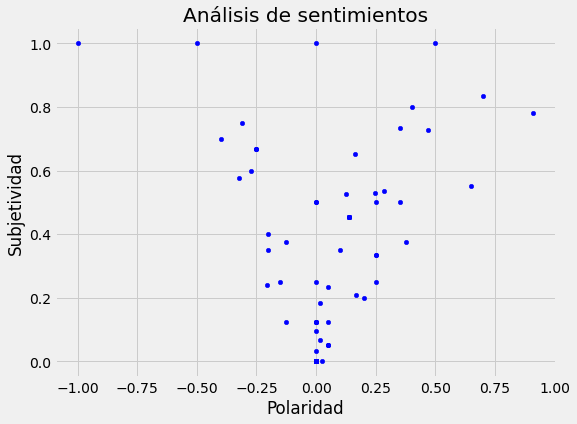

In [63]:
df.plot.scatter(x='polaridad', y='subjetividad', color='blue', figsize=(8,6))
plt.title('Análisis de sentimientos')
plt.xlabel('Polaridad')
plt.ylabel('Subjetividad')
plt.show()

In [64]:
# Calculamos el porcentaje de tweets positivos
df['analisis'].eq('Positivo').mean() * 100

37.0

In [65]:
# Calculamos el porcentaje de tweets positivos
df['analisis'].eq('Negativo').mean() * 100

15.0

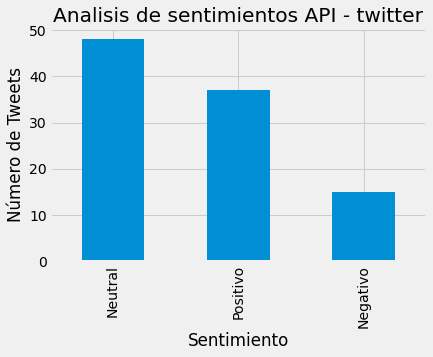

In [66]:
# Realizamos un gráfico de barras
df['analisis'].value_counts().plot.bar(title='Analisis de sentimientos API - twitter', xlabel='Sentimiento', ylabel='Número de Tweets')


####**Bibliografía**
"Sarkar, D. (2015). Text Analytics with Python: A Practical Real-World Approach.

Perkins, J. (2013). Python Text Processing with NLTK 2.0 Cookbook.

Bonzanini, M. (2015). Mastering Social Media Mining with Python.

Combs, A. T. (2015). Python Machine Learning Blueprints: Intuitive data projects you can relate to.

Portilla, J. (2016). Python for Data Analysis and Visualization - Learn python by doing."